In [ ]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import random
import math

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
import altair as alt                                # Alternative visualisation system



**Requirements for 𝑧-test**  
- The sample needs to be random  
- The sample size needs to be sufficiently large (𝑛 ≥ 30)  
    - als uw onderliggende verdeling normaal verdeeld is, dan is 𝑛 ≥ 30 niet nodig
- The test statistic needs to have a normal distribution  
- The standard deviation of the population, 𝜎, is known  
Sometimes these assumptions will not hold and in this case we can not
use the 𝑍-test!  
If the variable is normally distributed, you can use the 𝑡-test

p-value: 0.00020
p < a: reject H0
Critical value g ≃ 20.093
sample mean = 20.200 > g = 20.093: reject H0


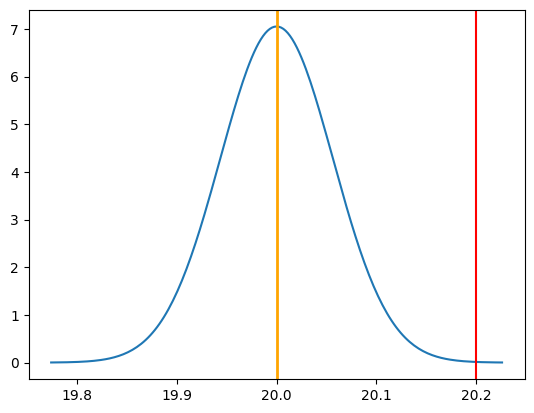

In [2]:
## RIGHT TAIL Z-TEST
#Step 1: formulate the null and alternative hypotheses
#- H0: μ = 100
#- H1: μ > 100

#Step 2: specify the significance level
# Properties of the sample:
n = 50      # sample size
sm = 20.2  # sample mean
s = 0.4    # population standard deviation (assumed to be known)
a = 0.05    # significance level (chosen by the researcher)
m0 = 20.0    # hypothetical population mean (H0)

# Plotting the sample distribution
# Gauss-curve plot:
# X-values
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)
# Y-values for the Gauss curve
dist_y = stats.norm.pdf(dist_x, m0, s/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(m0, color="orange", lw=2)
# Show the sample mean with a red line
dplot.axvline(sm, color="red")

#Step 3: compute the test statistic (red line in the plot) 
# Hier is dat 20.2

#Step 4: 
## method 1
# Determine the $p$-value and reject $H_0$ if $p < \alpha$.  
#The $p$-value is the probability, if the null hypothesis is true, to obtain
# a value for the test statistic that is at least as extreme as the
# observed value
p = stats.norm.sf(sm, loc=m0, scale=s/np.sqrt(n))
print("p-value: %.5f" % p)
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

## method 2
# An alternative method is to determine the critical region, i.e. the set of all values for the sample mean where $H_0$ may be rejected.  
# The boundary of that area is called the critical value $g$. To the left of it you can't reject $H_0$ (acceptance region), to the right you can (critical region). The area of the acceptance region is $1 - \alpha$, the area of the critical region is $\alpha$.
g = stats.norm.isf(a, loc = m0, scale = s / np.sqrt(n))
print("Critical value g ≃ %.3f" % g)
if (sm < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (sm, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (sm, g))


# Step 5
# We can conclude that if we assume that  $H_0$  is true, the probability to draw a sample from this population with this particular value for  $\bar{x}$  is very small indeed. With the chosen significance level, we can reject the null hypothesis.


In [ ]:
## LEFT TAIL Z-TEST
#Step 1: formulate the null and alternative hypotheses
#- H0: μ = 100
#- H1: μ < 100

#Step 2: specify the significance level
# Properties of the sample:
n = 50      # sample size
sm = 19.94  # sample mean
s = 0.4    # population standard deviation (assumed to be known)
a = 0.05    # significance level (chosen by the researcher)
m0 = 20.0    # hypothetical population mean (H0)

# Plotting the sample distribution
# Gauss-curve plot:
# X-values
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)
# Y-values for the Gauss curve
dist_y = stats.norm.pdf(dist_x, m0, s/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(m0, color="orange", lw=2)
# Show the sample mean with a red line
dplot.axvline(sm, color="red")

#Step 3: compute the test statistic (red line in the plot) 
# Hier is dat 19.94

#Step 4: 
## method 1
# Determine the $p$-value and reject $H_0$ if $p < \alpha$.  
#The $p$-value is the probability, if the null hypothesis is true, to obtain
#a value for the test statistic that is at least as extreme as the
# observed value
p = stats.norm.cdf(sm, loc=m0, scale=s/np.sqrt(n))
print("p-value: %.5f" % p)
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

## method 2
# An alternative method is to determine the critical region, i.e. the set of all values for the sample mean where $H_0$ may be rejected.  
# The boundary of that area is called the critical value $g$. To the right of it you can't reject $H_0$ (acceptance region), to the left you can (critical region). The area of the acceptance region is $\alpha$, the area of the critical region is $1 - \alpha$.
g = stats.norm.isf(1-a, loc = m0, scale = s / np.sqrt(n))
print("Critical value g ≃ %.3f" % g)
if (sm > g):
    print("sample mean = %.3f > g = %.3f: do not reject H0" % (sm, g))
else:
    print("sample mean = %.3f < g = %.3f: reject H0" % (sm, g))


# Step 5
#  We can conclude that there is not enough evidence to reject the
#  null hypothesis.

In [ ]:
## TWo tailed Z-TEST
#Step 1: formulate the null and alternative hypotheses
#- H0: μ = 100
#- H1: μ != 100

#Step 2: specify the significance level
# Properties of the sample:
n = 50      # sample size
sm = 19.94  # sample mean
s = 0.4    # population standard deviation (assumed to be known)
a = 0.05    # significance level (chosen by the researcher)
m0 = 20.0    # hypothetical population mean (H0)



#Step 3: compute the test statistic (red line in the plot) 
# Hier is dat 19.94

#Step 4: 
## method 1
# Calculate the $p$-value and reject $H_0$ if $p < \alpha/2$ (why do we divide by 2?).
p = stats.norm.cdf(sm, loc=m0, scale=s/np.sqrt(n))
print("p-value: %.5f" % p)
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

## method 2
# In this case, we have two critical values: $g_1$ on the left of the mean and $g_2$ on the right. The acceptance region still has area $1-\alpha$ and the critical region has area $\alpha$.
g1 = stats.norm.isf(1-a/2, loc = m0, scale = s / np.sqrt(n))
g2 = stats.norm.isf(a/2, loc = m0, scale = s / np.sqrt(n))

print("Acceptance region [g1, g2] ≃ [%.3f, %.3f]" % (g1,g2))
if (g1 < sm and sm < g2):
    print("Sample mean = %.3f is inside acceptance region: do not reject H0" % sm)
else:
    print("Sample mean = %.3f is outside acceptance region: reject H0" % sm)

# Plotting the sample distribution
# Gauss-curve
# X-values
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)
# Y-values
dist_y = stats.norm.pdf(dist_x, loc=m0, scale=s/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(m0, color="orange", lw=2)
# Sample mean in red
dplot.axvline(sm, color="red")
acc_x = np.linspace(g1, g2, num=101)
acc_y = stats.norm.pdf(acc_x, loc=m0, scale=s/np.sqrt(n))
# Fill the acceptance region in light blue
dplot.fill_between(acc_x, 0, acc_y, color='lightblue')

# Step 5
#  So if we do not make a priori statement whether the actual population mean is either smaller or larger, then the obtained sample mean turns out to be sufficiently probable. We cannot rule out a random sampling error. Or, in other words, we *cannot* reject the null hypothesis here.